# 1.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Econ441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [12]:
df_select = df[["case_status", "country_of_citizenship",'employer_state',"class_of_admission", "fw_info_birth_country"]]

# 3.) Clean your data for a decision tree


In [8]:

X = pd.get_dummies(df_select.drop(['case_status'],axis=1),drop_first=True)
y = df["case_status"]

In [9]:
X

,country_of_citizenship_ALBANIA,country_of_citizenship_ALGERIA,country_of_citizenship_ANDORRA,country_of_citizenship_ANGOLA,country_of_citizenship_ANTIGUA AND BARBUDA,country_of_citizenship_ARGENTINA,country_of_citizenship_ARMENIA,country_of_citizenship_ARUBA,country_of_citizenship_AUSTRALIA,country_of_citizenship_AUSTRIA,...,fw_info_birth_country_UNITED STATES OF AMERICA,fw_info_birth_country_URUGUAY,fw_info_birth_country_UZBEKISTAN,fw_info_birth_country_VENEZUELA,fw_info_birth_country_VIETNAM,fw_info_birth_country_WESTERN SAMOA,fw_info_birth_country_YEMEN,fw_info_birth_country_YUGOSLAVIA,fw_info_birth_country_ZAMBIA,fw_info_birth_country_ZIMBABWE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
374359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.) Fit and plot a decision tree of depth X


In [10]:
from sklearn import tree

In [11]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'fw_info_birth_country_INDIA <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.25, 0.625, 'class_of_admission_H-1B <= 0.5\ngini = 0.615\nsamples = 293027\nvalue = [136217, 117132, 23662, 16016]'),
 Text(0.125, 0.375, 'class_of_admission_L-1 <= 0.5\ngini = 0.651\nsamples = 82339\nvalue = [37670, 28172, 11083, 5414]'),
 Text(0.0625, 0.125, 'gini = 0.666\nsamples = 66249\nvalue = [29851, 21001, 10566, 4831]'),
 Text(0.1875, 0.125, 'gini = 0.563\nsamples = 16090\nvalue = [7819, 7171, 517, 583]'),
 Text(0.375, 0.375, 'country_of_citizenship_INDIA <= 0.5\ngini = 0.597\nsamples = 210688\nvalue = [98547, 88960, 12579, 10602]'),
 Text(0.3125, 0.125, 'gini = 0.596\nsamples = 109679\nvalue = [53555, 43710, 6837, 5577]'),
 Text(0.4375, 0.125, 'gini = 0.595\nsamples = 101009\nvalue = [44992, 45250, 5742, 5025]'),
 Text(0.75, 0.625, 'employer_state_NJ <= 0.5\ngini = 0.533\nsamples = 81335\nvalue = [45716, 31454, 1987, 2178]'),
 Text(0.625, 0.

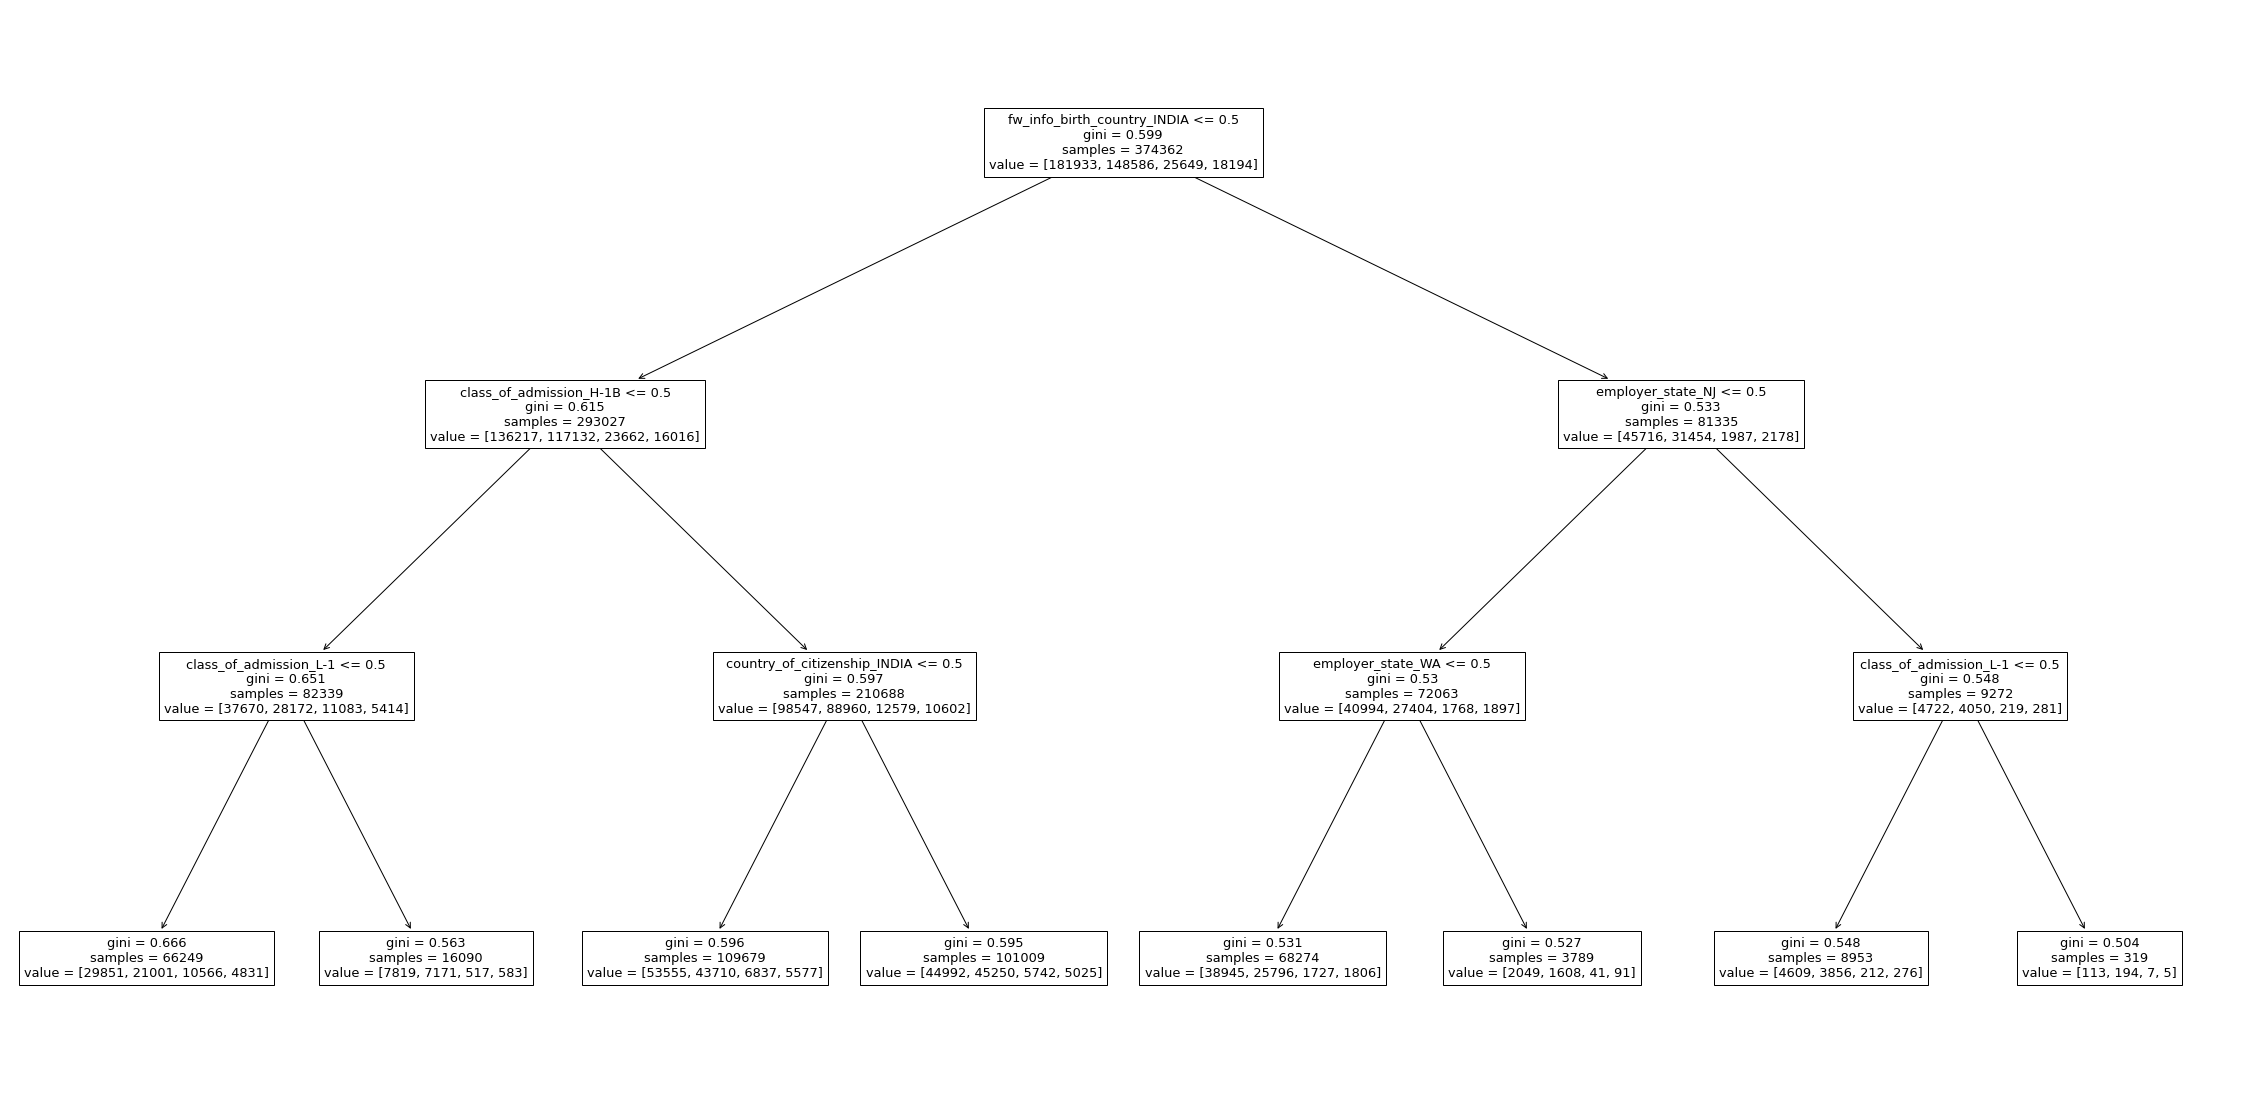

In [13]:
plt.figure(figsize = (40,20))
tree.plot_tree(clf,feature_names = X.columns )

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest (by sample size) leaf node is country of citizenship 'India', class of admision is not H-1B and the birth country is India.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [22]:
from sklearn.model_selection import train_test_split
max_depths = [1,2,3]
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1) #... Train test split

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)

  oos_accuracy =  clf.score(X_test,y_test)
  outputs.append(oos_accuracy)
print(outputs)# CALCULATE Out of sample accuracy

[0.4857959478049497, 0.4857959478049497, 0.48667744046585554]
